# Data Wrangling과 데이터 


## 날짜와 시간 데이터와 Data Wrangling

### 날짜와 시간 데이터 생성


In [81]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [1]:
# 데이터 셋 생성
import numpy as np
import pandas as pd

date_s=np.array(
    [
     '01-01-2021 12:45 AM',
     '05-01-2021 09:30 AM',
     '15-01-2021 08:15 PM'
    ]
)

date_s

array(['01-01-2021 12:45 AM', '05-01-2021 09:30 AM',
       '15-01-2021 08:15 PM'], dtype='<U19')

In [2]:
# 타임스탬프 객체화
[pd.to_datetime(date, format='%d-%m-%Y %I:%M %p') for date in date_s]

[Timestamp('2021-01-01 00:45:00'),
 Timestamp('2021-01-05 09:30:00'),
 Timestamp('2021-01-15 20:15:00')]

In [3]:
# datatime 객체화
[pd.to_datetime(date, format="%d-%m-%Y  %I:%M %p", errors="ignore") for date in date_s]

[Timestamp('2021-01-01 00:45:00'),
 Timestamp('2021-01-05 09:30:00'),
 Timestamp('2021-01-15 20:15:00')]

In [4]:
pd.to_datetime(date_s)

DatetimeIndex(['2021-01-01 00:45:00', '2021-05-01 09:30:00',
               '2021-01-15 20:15:00'],
              dtype='datetime64[ns]', freq=None)

### 시간대 추가


In [5]:
#tz 변수를 활용해서 시간대를 추가
import pandas as pd

pd.Timestamp('2021-01-15 00:00:00', tz='Europe/London')

Timestamp('2021-01-15 00:00:00+0000', tz='Europe/London')

In [6]:
date_s=pd.Timestamp('2021-01-15 00:00:00')

# 시간대 지정
date_in_london=date_s.tz_localize('Europe/London')

date_in_london

Timestamp('2021-01-15 00:00:00+0000', tz='Europe/London')

In [7]:
# 시간대를 바꿉니다.
date_in_london.tz_convert('Africa/Abidjan')

Timestamp('2021-01-15 00:00:00+0000', tz='Africa/Abidjan')

In [8]:
# 세 개의 날짜를 만듭니다.
dates = pd.Series(pd.date_range('2/2/2002', periods=3, freq='M'))

# 시간대를 지정합니다.
dates.dt.tz_localize('Africa/Abidjan')

0   2002-02-28 00:00:00+00:00
1   2002-03-31 00:00:00+00:00
2   2002-04-30 00:00:00+00:00
dtype: datetime64[ns, Africa/Abidjan]

In [9]:
# 라이브러리를 임포트합니다.
from pytz import all_timezones

# 두 개의 시간대를 확인합니다.
all_timezones[0:2]

['Africa/Abidjan', 'Africa/Accra']

In [10]:
dates.dt.tz_localize('dateutil/Aisa/Seoul')

0   2002-02-28
1   2002-03-31
2   2002-04-30
dtype: datetime64[ns]

In [11]:
import pytz

tz = pytz.timezone('Asia/Seoul')
dates.dt.tz_localize(tz)

0   2002-02-28 00:00:00+09:00
1   2002-03-31 00:00:00+09:00
2   2002-04-30 00:00:00+09:00
dtype: datetime64[ns, Asia/Seoul]

### 날짜와 시간 조회


In [12]:
import pandas as pd

df=pd.DataFrame()

df['date']=pd.date_range('1/1/2020', periods=100000, freq='H')

df.head()

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00


In [13]:
# 특정 시간대를 조회
df[
   (df['date'] > '2021-1-1 01:00:00') &
   (df['date'] <= '2021-1-1 04:00:00')
]

,date
8786,2021-01-01 02:00:00
8787,2021-01-01 03:00:00
8788,2021-01-01 04:00:00


In [14]:
df=df.set_index(df['date'])

df.loc['2021-1-1 01:00:00':'2021-1-1 04:00:00']

,date
date,
2021-01-01 01:00:00,2021-01-01 01:00:00
2021-01-01 02:00:00,2021-01-01 02:00:00
2021-01-01 03:00:00,2021-01-01 03:00:00
2021-01-01 04:00:00,2021-01-01 04:00:00


### 날짜 데이터에 대한 특성 구분


In [15]:
# 데이터 셋 생성
import pandas as pd

df=pd.DataFrame()

df['date']=pd.date_range('1/1/2020', periods=150, freq='W')

df.head()

,date
0,2020-01-05
1,2020-01-12
2,2020-01-19
3,2020-01-26
4,2020-02-02


In [16]:
# 년, 월, 일, 시, 분에 대한 특성 생성

df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute

df.head()

,date,year,month,day,hour,minute
0,2020-01-05,2020,1,5,0,0
1,2020-01-12,2020,1,12,0,0
2,2020-01-19,2020,1,19,0,0
3,2020-01-26,2020,1,26,0,0
4,2020-02-02,2020,2,2,0,0


### 날짜 사이의 차 계산


In [18]:
import pandas as pd

df=pd.DataFrame()

df['Start']=[pd.Timestamp('01-01-2021'), pd.Timestamp('01-04-2021')]
df['Stop']=[pd.Timestamp('01-01-2021'), pd.Timestamp('01-06-2021')]

df.head()

,Start,Stop
0,2021-01-01,2021-01-01
1,2021-01-04,2021-01-06


In [19]:
# 차 계산
df['Stop']-df['Start']

0   0 days
1   2 days
dtype: timedelta64[ns]

In [20]:
# 기간 계산
pd.Series(delta.days for delta in (df['Stop']-df['Start']))

0    0
1    2
dtype: int64

### 요일 인코딩


In [21]:
# 요일 인코딩
import pandas as pd

day_w=pd.Series(pd.date_range("1/1/2021",periods=5, freq="M"))

day_w.dt.day_name()

0       Sunday
1       Sunday
2    Wednesday
3       Friday
4       Monday
dtype: object

In [23]:
day_w.dt.weekday

0    6
1    6
2    2
3    4
4    0
dtype: int64

### 시차 특성 만들기


In [25]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame()

# 날짜를 만듭니다.
dataframe["dates"] = pd.date_range("1/1/2021", periods=5, freq="D")
dataframe["stock_price"] = [1.1,2.2,3.3,4.4,5.5]

# 한 행 뒤의 값을 가져옵니다.
dataframe["previous_days_stock_price"] = dataframe["stock_price"].shift(1)

# 데이터프레임을 확인합니다.
dataframe

,dates,stock_price,previous_days_stock_price
0,2021-01-01,1.1,NaN
1,2021-01-02,2.2,1.1
2,2021-01-03,3.3,2.2
3,2021-01-04,4.4,3.3
4,2021-01-05,5.5,4.4


### 통계

In [26]:
# 라이브러리를 임포트합니다.
import pandas as pd

# datetime을 만듭니다.
time_index = pd.date_range("01/01/2021", periods=5, freq="M")

# 데이터프레임을 만들고 인덱스를 설정합니다.
dataframe = pd.DataFrame(index=time_index)

# 특성을 만듭니다.
dataframe["Stock_Price"] = [1,2,3,4,5]

# 이동 평균을 계산합니다.
dataframe.rolling(window=2).mean()

,Stock_Price
2021-01-31,NaN
2021-02-28,1.5
2021-03-31,2.5
2021-04-30,3.5
2021-05-31,4.5


### 결측치 처리


In [1]:
# 데이터 셋 만들기

# 라이브러리를 임포트합니다.
import pandas as pd
import numpy as np

# 날짜를 만듭니다.
time_index = pd.date_range("01/01/2021", periods=5, freq="M")

# 데이터프레임을 만들고 인덱스를 지정합니다.
dataframe = pd.DataFrame(index=time_index)

# 누락된 값이 있는 특성을 만듭니다.
dataframe["Sales"] = [1.0,2.0,np.nan,np.nan,5.0]

dataframe

,Sales
2021-01-31,1.0
2021-02-28,2.0
2021-03-31,NaN
2021-04-30,NaN
2021-05-31,5.0


In [2]:
# 누락된 값을 보간합니다.
dataframe.interpolate()

,Sales
2021-01-31,1.0
2021-02-28,2.0
2021-03-31,3.0
2021-04-30,4.0
2021-05-31,5.0


In [3]:
# Forward-fill
dataframe.ffill()

,Sales
2021-01-31,1.0
2021-02-28,2.0
2021-03-31,2.0
2021-04-30,2.0
2021-05-31,5.0


In [30]:
# Back-fill
dataframe.bfill()

,Sales
2021-01-31,1.0
2021-02-28,2.0
2021-03-31,5.0
2021-04-30,5.0
2021-05-31,5.0


In [6]:
# 누락된 값 보간
dataframe.interpolate(method="quadratic")

,Sales
2021-01-31,1.000000
2021-02-28,2.000000
2021-03-31,3.059808
2021-04-30,4.038069
2021-05-31,5.000000


In [10]:
# 누락된 값 보간
dataframe.interpolate(method="linear")

,Sales
2021-01-31,1.0
2021-02-28,2.0
2021-03-31,3.0
2021-04-30,4.0
2021-05-31,5.0


In [13]:
# 누락된 값을 보간하기
dataframe.interpolate(limit=1, limit_direction="forward")

,Sales
2021-01-31,1.0
2021-02-28,2.0
2021-03-31,3.0
2021-04-30,NaN
2021-05-31,5.0


In [14]:
# 누락된 값을 보간하기
dataframe.interpolate(limit=1, limit_direction="backward")

,Sales
2021-01-31,1.0
2021-02-28,2.0
2021-03-31,NaN
2021-04-30,4.0
2021-05-31,5.0


## 이미지 데이터와 Data Wrangling

In [1]:
import cv2
cv2.__version__

'4.5.1'

### 이미지 로드

In [18]:
#라이브러리 불러오기
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [19]:
# 흑백 이미지 로드
image=cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

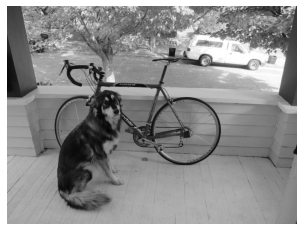

In [20]:
# 이미지를 화면에 출력하기
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [6]:
#타입
type(image)

numpy.ndarray

In [7]:
image

array([[ 57,  58,  60, ..., 100,  60,  66],
       [ 58,  58,  59, ...,  85,  59,  64],
       [ 58,  58,  59, ...,  64,  60,  55],
       ...,
       [167, 167, 170, ...,  69,  43,  55],
       [168, 167, 163, ...,  66,  44,  59],
       [164, 166, 160, ...,  67,  40,  42]], dtype=uint8)

In [8]:
#차원 확인
image.shape

(576, 768)

In [9]:
#행렬의 각 원소 확인
#각 원소의 값의 픽셀 강도, 0에서 255까지의 범위
image[0,0]

57

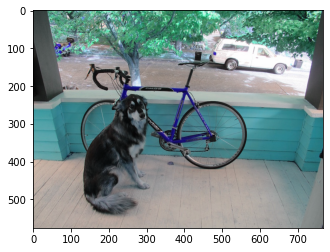

In [11]:
# 이미지 로드
image_bgr=cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_COLOR)
plt.imshow(image_bgr)
plt.show()

In [12]:
image_bgr[0,0]

array([50, 58, 57], dtype=uint8)

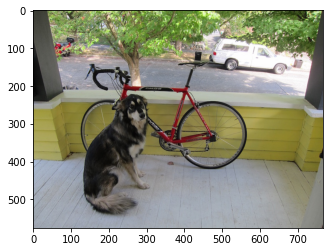

In [13]:
# RGB 변환
img_rgb=cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [14]:
img_rgb[0,0]

array([57, 58, 50], dtype=uint8)

### 이미지 저장

In [15]:
# 흑백 이미지 로드
image=cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

#  이미지 저장
cv2.imwrite("bigStudy/dog_new.jpg",image)

True

### 이미지 크기 변경

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 흑백 이미지 로드
image=cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

image.shape

(576, 768)

In [19]:
# 이미지 크기를 50x50 픽셀로 변경
image_50x50=cv2.resize(image, (50,50))

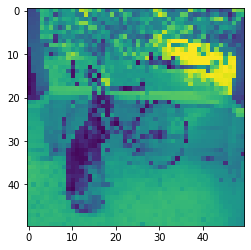

In [20]:
plt.imshow(image_50x50)
plt.show()

### 이미지 자르기

In [21]:
# 흑백 이미지 로드
image=cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

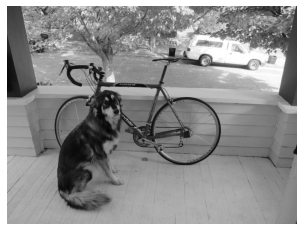

In [22]:
# 이미지를 화면에 출력하기
plt.imshow(image, cmap="gray"), plt.axis("off")
plt.show()

In [23]:
image.shape

(576, 768)

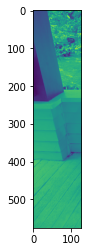

In [24]:
image_cropped=image[:,:128]

plt.imshow(image_cropped)
plt.show()

In [25]:
image_cropped.shape

(576, 128)

### 이미지 흐리기

In [27]:
# 흑백 이미지 로드
image=cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

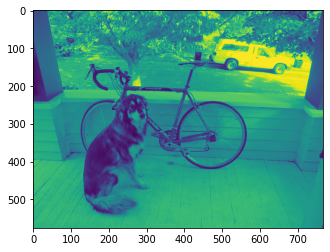

In [28]:
plt.imshow(image)
plt.show()

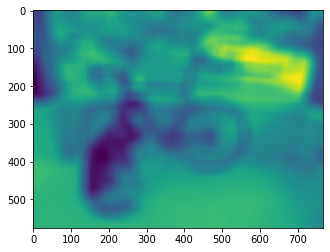

In [29]:
# 이미지 흐리기
image_blur=cv2.blur(image, (40,40))

plt.imshow(image_blur)
plt.show()

In [30]:
# 커널을 이용해 처리하기

# 커널 생성
kernel=np.ones((5,5)) / 10.0

# 커널 확인
kernel

array([[0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1]])

In [31]:
# 커널을 적용
image_kernel=cv2.filter2D(image, -1, kernel)

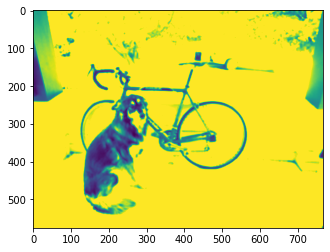

In [33]:
plt.imshow(image_kernel)
plt.show()

In [35]:
# 흑백 이미지 로드
image=cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

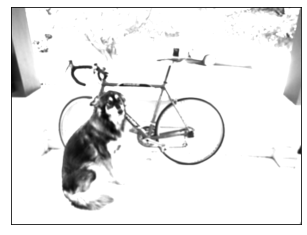

In [34]:
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) #tick 눈금
plt.show()

### 이미지 샤픈

In [38]:
# 흑백 이미지 로드
image=cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

In [43]:
# 커널 생성
kernel=np.array(
    [
     [0,-1,0],
     [-1,5,-1],
     [0,-1,0]
    ]
)

In [44]:
# 커널 적용
image_sharp=cv2.filter2D(image, -1, kernel)

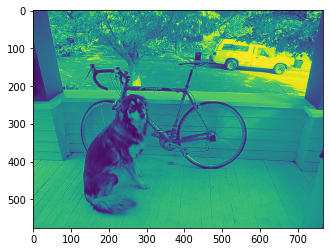

In [45]:
plt.imshow(image_sharp)
plt.show()

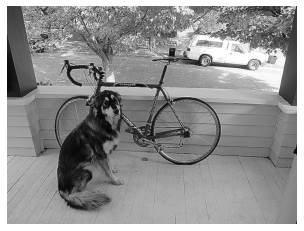

In [46]:
plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 그래프의 모든 축과 라벨(이름)을 제거
plt.show()

### 이미지 대비

In [49]:
# 흑백 이미지 로드
image=cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

In [50]:
image_enhanced=cv2.equalizeHist(image)

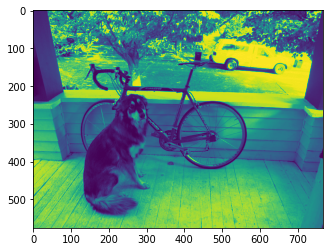

In [51]:
plt.imshow(image_enhanced)
plt.show()

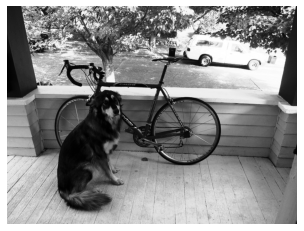

In [52]:
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()

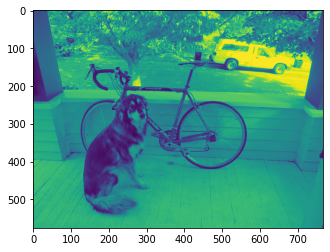

In [53]:
plt.imshow(image)
plt.show()

### 색 구분

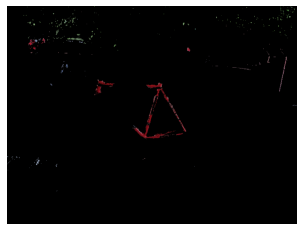

In [54]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 로드합니다.
image_bgr = cv2.imread('bigStudy/dog.jpg')

# BGR에서 HSV로 변환합니다.
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# HSV에서  red 값의 범위를 정의합니다.
lower_red = np.array([50,50,100])
upper_red= np.array([255,255,200])

# 마스크를 만듭니다.
mask = cv2.inRange(image_hsv, lower_red, upper_red)

# 이미지에 마스크를 적용합니다.
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# BGR에서 RGB로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# 이미지를 출력합니다.
plt.imshow(image_rgb), plt.axis("off")
plt.show()

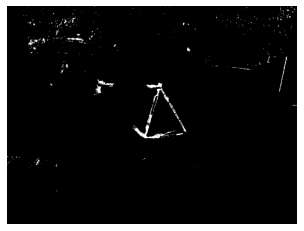

In [60]:
# 마스크를 출력합니다.
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

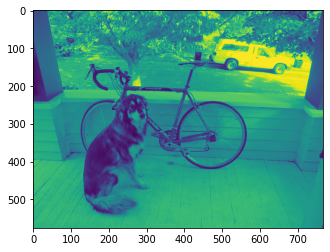

In [61]:
plt.imshow(image)
plt.show()

### 이미지 이진화

In [55]:
# 흑백 이미지 로드
image=cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

In [56]:
# 임계처리
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(
    image,
    max_output_value, # 출력 픽셀 강도의 최대값 설정
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # 임계값을 주변 픽셀 강도의 가중치 합 설정- 가중치는 가우시안을 사용
    cv2.THRESH_BINARY, # 주변 픽셀의 이진값을 임계값으로 설정
    neighborhood_size, # 임계값 결정하는 데 있어서 사용하는 주변 영역 크기
    subtract_from_mean # 임계값에서 빼고 싶은 상수-조정하고 싶을 때
)

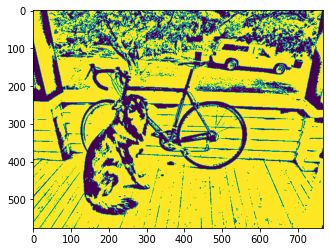

In [57]:
plt.imshow(image_binarized)
plt.show()

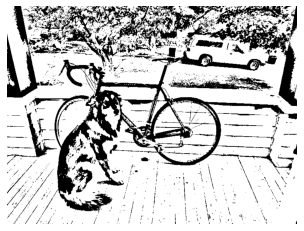

In [58]:
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

### 배경 제거하기

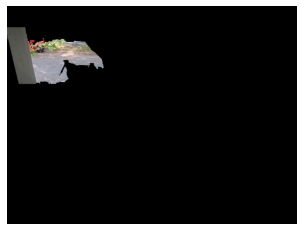

In [64]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 로드하고 RGB로 변환합니다.
image_bgr = cv2.imread('bigStudy/dog.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 사각형 좌표: 시작점의 x, 시작점의 y, 너비, 높이
rectangle = (0, 56, 256, 150)

# 초기 마스크를 만듭니다.
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열을 만듭니다.
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut을 실행합니다.
cv2.grabCut(image_rgb, # 원본 이미지
            mask, # 마스크
            rectangle, # 사각형
            bgdModel, # 배경을 위한 임시 배열
            fgdModel, # 전경을 위한 임시 배열
            5, # 반복 횟수
            cv2.GC_INIT_WITH_RECT) # 사각형을 사용한 초기화

# 배경인 곳은 0, 그외에는 1로 설정한 마스크를 만듭니다.
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱해 배경을 제외합니다.
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# 이미지를 출력합니다.
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

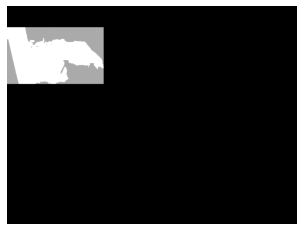

In [65]:
# 마스크를 출력합니다.
plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()

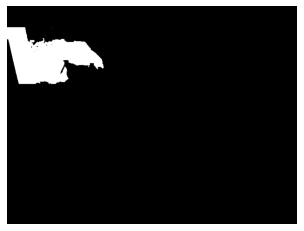

In [66]:
# 마스크를 출력합니다.
plt.imshow(mask_2, cmap='gray'), plt.axis("off")
plt.show()

### 경계선 감지

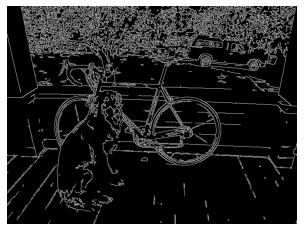

In [67]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image_gray = cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산합니다.
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정합니다.
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# 이미지를 출력합니다.
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

### 모서리 감지

In [70]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image_bgr = cv2.imread('bigStudy/dog.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# 모서리 감지 매개변수를 설정합니다.
block_size = 2
aperture = 29
free_parameter = 0.04

# 모서리를 감지합니다.
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

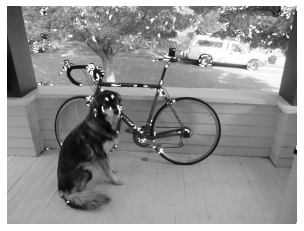

In [71]:
# 모서리 표시를 부각시킵니다.
detector_responses = cv2.dilate(detector_responses, None)

# 임계값보다 큰 감지 결과만 남기고 흰색으로 표시합니다.
threshold = 0.02
image_bgr[detector_responses >
          threshold *
          detector_responses.max()] = [255,255,255]

# 흑백으로 변환합니다.
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 이미지를 출력합니다.
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

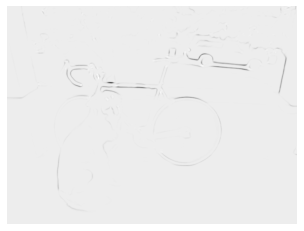

In [72]:
# 가능성이 높은 모서리를 출력합니다.
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

In [74]:
# 이미지를 로드합니다.
image_bgr = cv2.imread('bigStudy/dog.jpg')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 감지할 모서리 개수
corners_to_detect = 10
minimum_quality_score = 0.05
minimum_distance = 25

# 모서리를 감지합니다.
corners = cv2.goodFeaturesToTrack(image_gray,
                                  corners_to_detect,
                                  minimum_quality_score,
                                  minimum_distance)
corners = np.float32(corners)

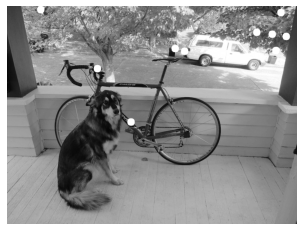

In [75]:
# 모서리마다 흰 원을 그립니다.
for corner in corners:
    x, y = corner[0]
    cv2.circle(image_bgr, (x,y), 10, (255,255,255), -1)

# 흑백 이미지로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 이미지를 출력합니다.
plt.imshow(image_rgb, cmap='gray'), plt.axis("off")
plt.show()

### 이미지 데이터가 담긴 다차원 배열을 벡터로 변환

In [76]:
# 이미지를 로드합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 흑백 이미지로 로드합니다.
image = cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지를 10x10 픽셀 크기로 변환합니다.
image_10x10 = cv2.resize(image, (10, 10))

# 이미지 데이터를 1차원 벡터로 변환합니다.
image_10x10.flatten()

array([ 69, 132, 125, 129, 169, 152, 178,  90, 180, 121,  83, 129, 137,
        41, 118,  96, 238, 146, 108,  59,  88, 168, 155, 113, 155,  98,
        36, 251, 203, 253,  82, 163, 153, 162, 136, 138, 151, 224, 160,
        99, 161, 127, 107,  19, 106,  18, 120, 128, 126, 152, 158, 128,
        41,  12, 112, 121, 143, 148, 115, 133, 140,  97,  15, 137, 128,
        85, 124, 120, 107, 117, 174, 162,  24, 108, 150, 144, 155, 153,
       135, 122, 171, 148,  43, 142, 163, 166, 169, 171, 157, 132, 156,
       171, 155, 163, 169, 173, 172, 172, 165, 139], dtype=uint8)

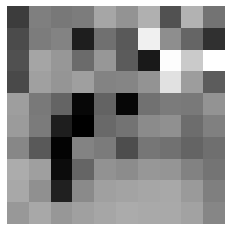

In [77]:
plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

In [78]:
image_10x10.shape

(10, 10)

In [79]:
image_10x10.flatten().shape

(100,)

In [81]:
# 컬러 이미지로 로드합니다.
image_color = cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_COLOR)

# 이미지를 10 × 10 픽셀 크기로 변환합니다.
image_color_10x10 = cv2.resize(image_color, (10, 10))

# 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력합니다.
image_color_10x10.flatten().shape

(300,)

In [83]:
# 흑백 이미지로 로드합니다.
image_256x256_gray = cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력합니다.
image_256x256_gray.flatten().shape

(442368,)

In [84]:
# 컬러 이미지로 로드합니다.
image_256x256_color = cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_COLOR)

# 이미지 데이터를 1차원 벡터로 변환하고 차원을 출력합니다.
image_256x256_color.flatten().shape

(1327104,)

In [ ]:
### 평균 색을 특성으로 인코딩

In [86]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# BGR 이미지로 로드합니다.
image_bgr = cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_COLOR)

# 각 채널의 평균을 계산합니다.
channels = cv2.mean(image_bgr)

# 파랑과 빨강을 바꿉니다(BGR에서 RGB로 만듭니다)
observation = np.array([(channels[2], channels[1], channels[0])])

# 채널 평균 값을 확인합니다.
observation

array([[134.44703957, 135.66566298, 114.07968705]])

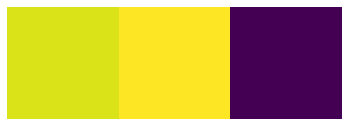

In [87]:
# 이미지를 출력합니다.
plt.imshow(observation), plt.axis("off")
plt.show()

In [ ]:
## 컬러 히스토그램을 특성으로 인코딩

In [88]:
# 라이브러리를 임포트합니다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지를 로드합니다.
image_bgr = cv2.imread('bigStudy/dog.jpg', cv2.IMREAD_COLOR)

# RGB로 변환합니다.
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 특성 값을 담을 리스트를 만듭니다.
features = []

# 각 컬러 채널에 대해 히스토그램을 계산합니다.
colors = ("r","g","b")

In [89]:
# 각 채널을 반복하면서 히스토그램을 계산하고 리스트에 추가합니다.
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
                        [i], # 채널 인덱스
                        None, # 마스크 없음
                        [256], # 히스토그램 크기
                        [0,256]) # 범위
    features.extend(histogram)

# 샘플의 특성 값으로 벡터를 만듭니다.
observation = np.array(features).flatten()

# 처음 다섯 개의 특성을 출력합니다.
observation[0:5]

array([287., 190., 133., 157., 151.], dtype=float32)

In [90]:
# RGB 채널 값을 확인합니다.
image_rgb[0,0]

array([57, 58, 50], dtype=uint8)

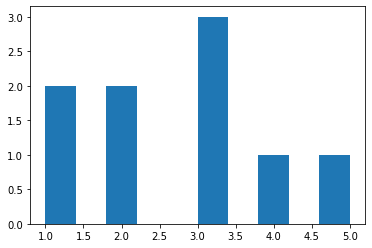

In [91]:
# 판다스를 임포트합니다.
import pandas as pd

# 예시 데이터를 만듭니다.
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])

# 히스토그램을 출력합니다.
data.hist(grid=False)
plt.show()

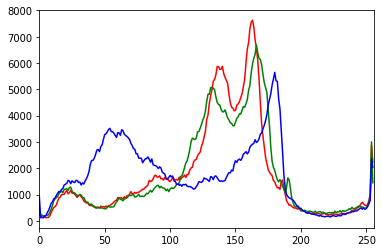

In [92]:
# 각 컬러 채널에 대한 히스토그램을 계산합니다.
colors = ("r","g","b")

# 컬러 채널을 반복하면서 히스토그램을 계산하고 그래프를 그립니다.
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # 이미지
                        [i], # 채널 인덱스
                        None, # 마스크 없음
                        [256], # 히스토그램 크기
                        [0,256]) # 범위
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])

# 그래프를 출력합니다.
plt.show()

# 차원 축소

## 특성 추출과 차원 축소

### 주성분 분석(Principal Component Analysis, PCA)

In [2]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)

# 99%의 분산을 유지하도록 PCA 클래스 객체를 만듭니다.
pca = PCA(n_components=0.99, whiten=True)

# PCA를 수행합니다.
features_pca = pca.fit_transform(features)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_pca.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 54


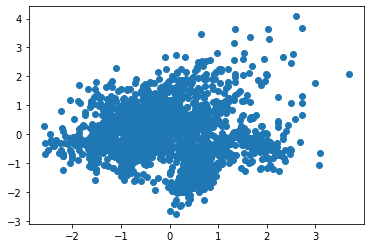

In [3]:
import matplotlib.pyplot as plt

plt.scatter(features_pca[:, 0], features_pca[:, 1])
plt.show()

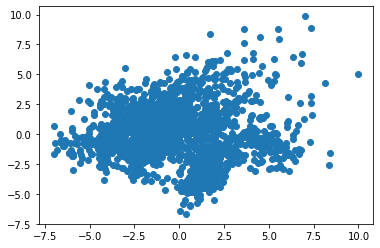

In [4]:
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:, 0], features_nowhiten[:, 1])
plt.show()

In [5]:
pca_nowhiten.components_.shape

(54, 64)

In [6]:
import numpy as np

np.allclose(features_nowhiten, np.dot(features, pca_nowhiten.components_.T))

True

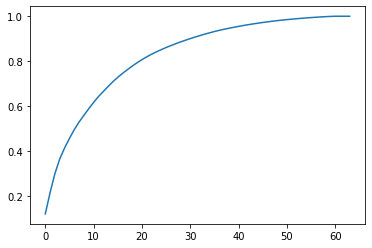

In [7]:
pca = PCA(whiten=True).fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

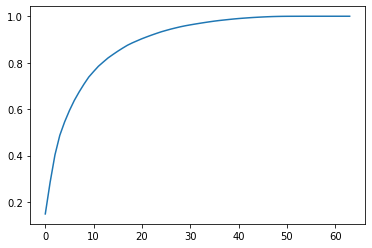

In [8]:
# 표준화하지 않은 원본 데이터를 사용합니다.
pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

### 선형적으로 구분되지 않는 데이터의 차원을 축소하기

#### Kernel trick을 사용한 주성분 분석


In [11]:
# 라이브러리를 임포트합니다.
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않는 데이터를 만듭니다.
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

# 방사 기저 함수(radius basis function, RBF)를 사용하여 커널 PCA를 적용합니다.
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수: 1


In [12]:
kpca.components_

AttributeError: 'KernelPCA' object has no attribute 'components_'

### 클래스 분리를 최대화함으로써 특성을 줄이기

#### LDA(linear discriminant analysis)


In [13]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 붓꽃 데이터셋을 로드합니다.
iris = datasets.load_iris()
features = iris.data
target = iris.target

# LDA 객체를 만들고 실행하여 특성을 변환합니다.
lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features, target).transform(features)

# 특성 개수를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 1


In [14]:
lda.explained_variance_ratio_

array([0.9912126])

In [15]:
# LDA를 만들고 실행합니다.
lda = LinearDiscriminantAnalysis(n_components=None)
features_lda = lda.fit(features, target)

# 설명된 분산의 비율이 담긴 배열을 저장합니다.
lda_var_ratios = lda.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var: float) -> int:
    # 설명된 분산의 초기값을 지정합니다.
    total_variance = 0.0

    # 특성 개수의 초깃값을 지정합니다.
    n_components = 0

    # 각 특성의 설명된 분산을 순회합니다.
    for explained_variance in var_ratio:

        # 설명된 분산 값을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산이 목표치에 도달하면 
        if total_variance >= goal_var:
            # 반복을 종료합니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(lda_var_ratios, 0.95)

1

### NMF를 사용한 특성 축소

In [16]:
# 라이브러리를 임포트합니다.
from sklearn.decomposition import NMF
from sklearn import datasets

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 로드합니다.
features = digits.data

# NMF를 만들고 학습하고 적용합니다.
nmf = NMF(n_components=10, random_state=1)
features_nmf = nmf.fit_transform(features)

# 결과를 출력합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_nmf.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


/usr/local/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [17]:
nmf.components_.shape

(10, 64)

In [18]:
np.all(nmf.components_ >= 0)

True

In [19]:
np.mean(features - np.dot(features_nmf, nmf.components_))

-0.20062043744127714

In [20]:
nmf_mu = NMF(n_components=10, solver='mu', random_state=1)
features_nmf_mu = nmf_mu.fit_transform(features)

In [21]:
np.mean(features - np.dot(features_nmf_mu, nmf_mu.components_))

-0.12629945585681135

### TSVD를 사용한 특성 축소

In [22]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

# 데이터를 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 표준화 처리합니다.
features = StandardScaler().fit_transform(digits.data)

# 희소 행렬을 만듭니다.
features_sparse = csr_matrix(features)

# TSVD 객체를 만듭니다.
tsvd = TruncatedSVD(n_components=10)

# 희소 행렬에 TSVD를 적용합니다.
features_sparse_tsvd = tsvd.fit(features_sparse).transform(features_sparse)

# 결과를 출력합니다.
print("원본 특성 개수:", features_sparse.shape[1])
print("줄어든 특성 개수:", features_sparse_tsvd.shape[1])

원본 특성 개수: 64
줄어든 특성 개수: 10


In [23]:
# 처음 세 개의 성분이 설명하는 분산의 비율 합
tsvd.explained_variance_ratio_[0:3].sum()

0.30039385371194716

In [24]:
# 특성 개수보다 하나 작은 TSVD를 만들고 실행합니다.
tsvd = TruncatedSVD(n_components=features_sparse.shape[1]-1)
features_tsvd = tsvd.fit(features)

# 설명된 분산을 리스트에 저장합니다.
tsvd_var_ratios = tsvd.explained_variance_ratio_

# 함수를 만듭니다.
def select_n_components(var_ratio, goal_var):
    # 설명된 분산을 초기화합니다.
    total_variance = 0.0

    # 특성 개수를 초기화합니다.
    n_components = 0

    # 특성의 설명된 분산을 순환합니다.
    for explained_variance in var_ratio:

        # 설명된 분산을 누적합니다.
        total_variance += explained_variance

        # 성분 개수를 카운트합니다.
        n_components += 1

        # 설명된 분산의 목표에 도달하면
        if total_variance >= goal_var:
            # 반복을 마칩니다.
            break

    # 성분 개수를 반환합니다.
    return n_components

# 함수를 실행합니다.
select_n_components(tsvd_var_ratios, 0.95)

40

In [25]:
features = digits.data - np.mean(digits.data, axis=0)

pca = PCA(n_components=40, random_state=1)
features_pca = pca.fit_transform(features)

In [26]:
tsvd = TruncatedSVD(n_components=40, random_state=1)
features_tsvd = tsvd.fit_transform(features)

In [27]:
np.max(np.abs(features_pca - features_tsvd))

0.0020109620812414075

## 특성 선택과 차원 축소

### 분산을 기준으로 수치 특성 선택

In [1]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

# 예제 데이터를 로드합니다.
iris = datasets.load_iris()

# 특성과 타깃을 만듭니다.
features = iris.data
target = iris.target

# 기준값을 만듭니다.
thresholder = VarianceThreshold(threshold=.5)

# 기준값보다 높은 특성을 선택합니다.
features_high_variance = thresholder.fit_transform(features)

# 선택한 특성을 확인합니다.
features_high_variance[0:3]

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2]])

In [2]:
# 분산을 확인합니다.
thresholder.variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [3]:
# 라이브러리를 임포트합니다.
from sklearn.preprocessing import StandardScaler

# 특성 행렬을 표준화합니다.
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# 각 특성의 분산을 계산합니다.
selector = VarianceThreshold()
selector.fit(features_std).variances_

array([1., 1., 1., 1.])

### 분산을 기준으로 이진 특성 선택

In [4]:
# 라이브러리를 임포트합니다.
from sklearn.feature_selection import VarianceThreshold

# 예제 특성 행렬을 만듭니다.
# 특성 0: 80%가 클래스 0
# 특성 1: 80%가 클래스 1
# 특성 2: 60%가 클래스 0, 40%는 클래스 1
features = [[0, 1, 0],
            [0, 1, 1],
            [0, 1, 0],
            [0, 1, 1],
            [1, 0, 0]]

# 분산을 기준으로 선택합니다.
thresholder = VarianceThreshold(threshold=(.75 * (1 - .75)))
thresholder.fit_transform(features)

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [5]:
thresholder.variances_

array([0.16, 0.16, 0.24])

In [6]:
import numpy as np
np.var(features, axis=0)

array([0.16, 0.16, 0.24])

### 상관관계가 큰 특성

In [7]:
# 라이브러리를 임포트합니다.
import pandas as pd
import numpy as np

# 상관관계가 큰 두 개의 특성을 가진 특성 행렬을 만듭니다.
features = np.array([[1, 1, 1],
                     [2, 2, 0],
                     [3, 3, 1],
                     [4, 4, 0],
                     [5, 5, 1],
                     [6, 6, 0],
                     [7, 7, 1],
                     [8, 7, 0],
                     [9, 7, 1]])

# 특성 행렬을 DataFrame으로 변환합니다.
dataframe = pd.DataFrame(features)

# 상관관계 행렬을 만듭니다.
corr_matrix = dataframe.corr().abs()

# 상관관계 행렬의 상삼각(upper triangle) 행렬을 선택합니다.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
                          k=1).astype(np.bool))

# 상관 계수가 0.95보다 큰 특성 열의 인덱스를 찾습니다.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# 특성을 삭제합니다.
dataframe.drop(dataframe.columns[to_drop], axis=1).head(3)

,0,2
0,1,1
1,2,0
2,3,1


In [8]:
dataframe.corr()

,0,1,2
0,1.000000,0.976103,0.000000
1,0.976103,1.000000,-0.034503
2,0.000000,-0.034503,1.000000


In [9]:
upper

,0,1,2
0,NaN,0.976103,0.000000
1,NaN,NaN,0.034503
2,NaN,NaN,NaN


In [10]:
np.corrcoef(features, rowvar=False)

array([[ 1.        ,  0.97610336,  0.        ],
       [ 0.97610336,  1.        , -0.03450328],
       [ 0.        , -0.03450328,  1.        ]])

In [11]:
np.triu(np.ones((4, 4)), k=2)

array([[0., 0., 1., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [12]:
np.tril(np.ones((4, 4)), k=0)

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

### 범주형 특성에서 관련 없는 특성 삭제

In [13]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

# 데이터를 로드합니다.
iris = load_iris()
features = iris.data
target = iris.target

# 범주형 데이터를 정수형으로 변환합니다.
features = features.astype(int)

# 카이제곱 통계값이 가장 큰 특성 두 개를 선택합니다.
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kbest.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 2


In [14]:
# F-값이 가장 높은 특성 두 개를 선택합니다.
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)

# 결과를 확인합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kbest.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 2


In [15]:
# 라이브러리를 임포트합니다.
from sklearn.feature_selection import SelectPercentile

# 가장 큰 F-값의 상위 75% 특성을 선택합니다.
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)

# 결과를 선택합니다.
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_kbest.shape[1])

원본 특성 개수: 4
줄어든 특성 개수: 3


### 재귀적 특성 제거(RFE: recursive feature elimination)

In [18]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model

# 특성 행렬과 타깃 벡터를 생성합니다.
features, target = make_regression(n_samples = 10000,
                                   n_features = 100,
                                   n_informative = 2,
                                   random_state = 1)

# 선형 회귀 모델을 만듭니다.
ols = linear_model.LinearRegression()

# 재귀적으로 특성을 제거합니다.
rfecv = RFECV(estimator=ols, step=1, scoring="neg_mean_squared_error")
rfecv.fit(features, target)
rfecv.transform(features)

array([[ 0.00850799,  0.7031277 ],
       [-1.07500204,  2.56148527],
       [ 1.37940721, -1.77039484],
       ...,
       [-0.80331656, -1.60648007],
       [ 0.39508844, -1.34564911],
       [-0.55383035,  0.82880112]])

In [19]:
# 최선의 특성 개수
rfecv.n_features_

2

In [20]:
# 선택된 특성이 표시된 불리언 마스크
rfecv.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [21]:
# 특성의 순위: 최고(1)에서 최악(96)까지
rfecv.ranking_

array([51, 30, 41, 58, 18,  1,  8, 39, 46, 92, 81, 25,  2, 40, 95,  4, 84,
       27, 68, 52, 38, 20,  3, 61, 85, 89, 77, 50, 73, 57, 37, 86, 79, 15,
       13, 45, 31, 66, 17,  1, 71, 80, 64,  5, 32, 42, 11, 62, 78, 74, 94,
       12, 97, 48, 87, 54, 59, 21, 98, 44, 10, 29, 33, 72, 47, 35, 96, 16,
       53, 63, 28, 65, 14, 99, 90, 23, 91, 82, 36, 83,  7, 43,  9, 60, 49,
       76, 55, 70, 34, 22, 67, 56, 93, 26, 24, 19,  6, 75, 69, 88])

In [22]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=ols, n_features_to_select=3)
rfe.fit(features, target)
rfe.transform(features)

array([[ 0.00850799,  0.3207671 ,  0.7031277 ],
       [-1.07500204, -0.05459472,  2.56148527],
       [ 1.37940721, -0.47644   , -1.77039484],
       ...,
       [-0.80331656, -1.18480381, -1.60648007],
       [ 0.39508844,  0.21198124, -1.34564911],
       [-0.55383035, -0.40487438,  0.82880112]])

# 과제PCA 적용해 유방암 데이터셋 시각화하기

## 유방암 데이터의 클래스별 특성 히스토그램

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

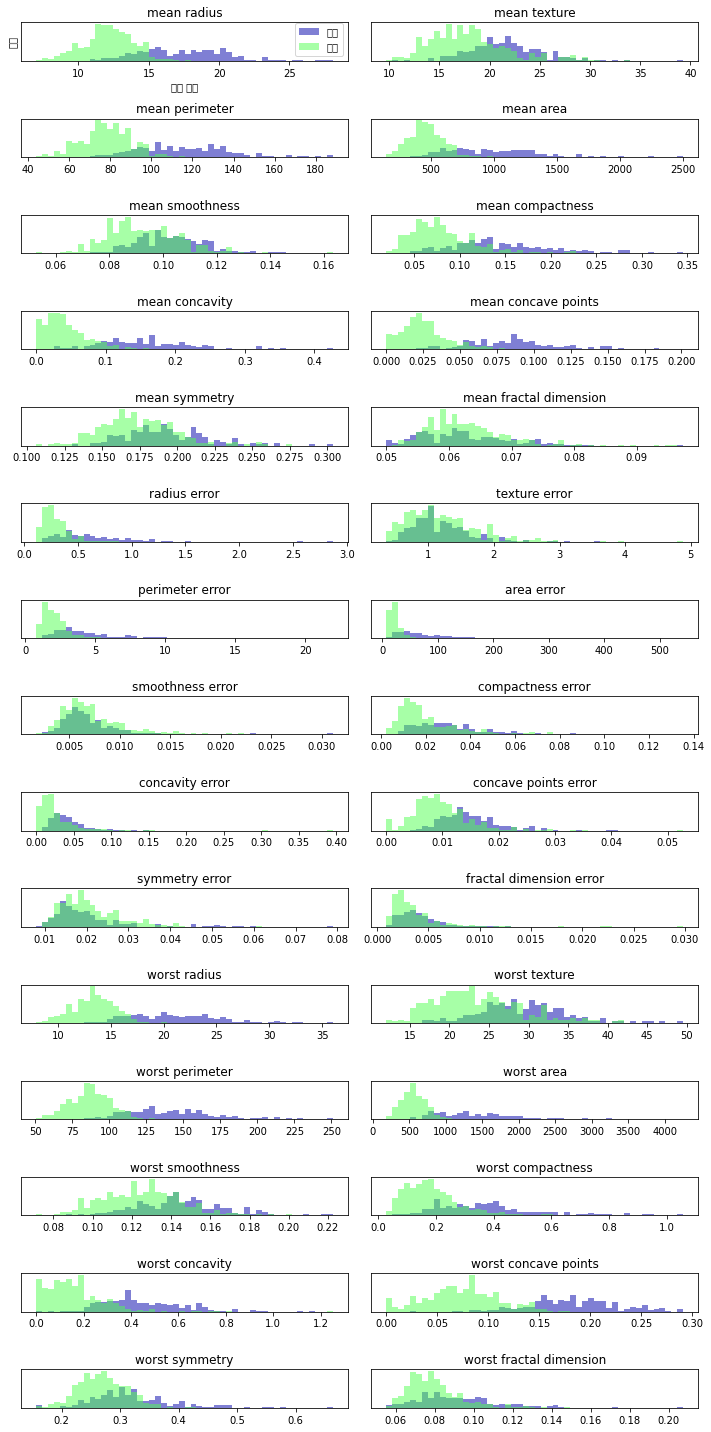

In [67]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import mglearn

cancer = load_breast_cancer()

fig,axes = plt.subplots(15,2,figsize=(10,20))

malignant = cancer.data[cancer.target==0]

benign = cancer.data[cancer.target==1]

ax = axes.ravel()

for i in range(30):

    _,bins = np.histogram(cancer.data[:,i],bins=50)

    ax[i].hist(malignant[:,i],bins=bins, color=mglearn.cm3(0),alpha=.5)

    ax[i].hist(benign[:,i],bins=bins, color=mglearn.cm3(2),alpha=.5)

    ax[i].set_title(cancer.feature_names[i])

    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

## pca적용 전에 StandardScaler를 사용해 데이터 스케일 조정
두개의 주성분을 사용해 그린 유방암 데이터셋의 2차원 산점도

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


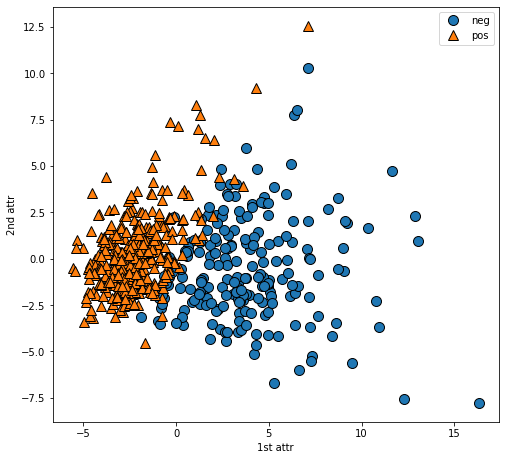

In [68]:
import matplotlib.pyplot as plt

import mglearn

from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler



cancer = load_breast_cancer()



# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정

standard_scaler = StandardScaler()

standard_scaler.fit(cancer.data)



X_scaled = standard_scaler.transform(cancer.data)



# PCA 객체를 생성하고 fit메서드를 호출해 주성분을 찾고, transform 메서드를 호출해 데이터를 회전시키고 차원을 축소한다.

# 기본값일때 PCA는 데이터를 회전만 시키고 모든 주성분을 유지한다.

# 데이터의 차원을 줄이려면 PCA 객체를 지정하면 된다.



from sklearn.decomposition import PCA



# 데이터 첫 2개의 성분만 유지한다.

pca = PCA(n_components=2)



# PCA 모델 만들기

pca.fit(X_scaled)



# 처음 두개의 주성분을 사용해 데이터 변환

X_pca = pca.transform(X_scaled)



print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))

print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

# 원본 데이터 형태 : (569, 30)

# 축소된 데이터 형태 : (569, 2)



# 두개의 주성분을 그래프로 나타내자.

plt.figure(figsize=(8,8))

mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)

plt.legend(["neg","pos"],loc="best")

plt.gca().set_aspect("equal")

plt.xlabel("1st attr")

plt.ylabel("2nd attr")

plt.show()

## components_ 값을 출력

In [69]:
from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler



cancer = load_breast_cancer()



# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정

standard_scaler = StandardScaler()

standard_scaler.fit(cancer.data)



X_scaled = standard_scaler.transform(cancer.data)



from sklearn.decomposition import PCA

# 데이터 첫 2개의 성분만 유지한다.

pca = PCA(n_components=2)

# PCA 모델 만들기

pca.fit(X_scaled)



# 처음 두개의 주성분을 사용해 데이터 변환

X_pca = pca.transform(X_scaled)



print("PCA 주성분: {}".format(pca.components_.shape))

print("PCA 주성분: {}".format(pca.components_))

PCA 주성분: (2, 30)
PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


## 유방암 데이터셋에서 찾은 처음 두 개의 주성분 히트맵

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두\xa0번째\xa0주성분')

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

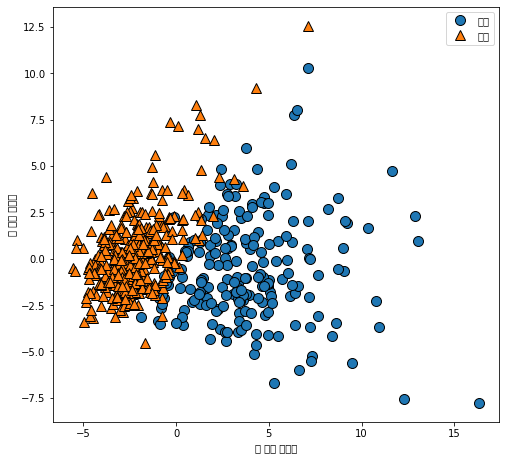

In [75]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA



cancer = load_breast_cancer()

# StandardScaler를 사용해 각 틍성의 분산이 1이 되도록 스케일 조정

standard_scaler = StandardScaler()

standard_scaler.fit(cancer.data)



X_scaled = standard_scaler.transform(cancer.data)



# 데이터 첫 2개의 성분만 유지한다.

pca = PCA(n_components=2)



# PCA 모델 만들기

pca.fit(X_scaled)



# 처음 두새의 주성분을 사용해 데이터 변환

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.



plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"],loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

PCA 주성분 형태: (2, 30)
PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


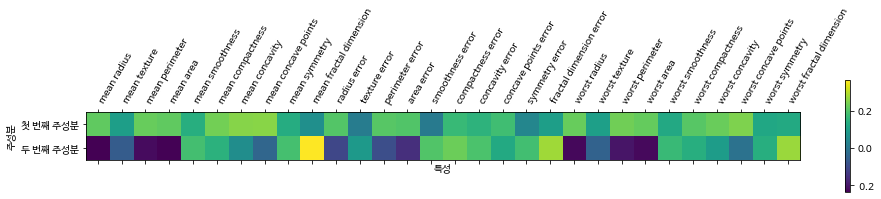

In [82]:
print("PCA 주성분 형태:", pca.components_.shape)
print("PCA 주성분:", pca.components_)

plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])

plt.colorbar()

plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')

plt.xlabel("특성")

plt.ylabel("주성분")

plt.show()